<a href="https://colab.research.google.com/github/sinara08/ML_Feature_Engineering/blob/main/Feature_Engineering_Cookbook_2ndEdt/Day1_Imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 5.2 MB/s 


In [3]:
import random
import numpy as np
import pandas as pd

data = pd.read_csv('/content/crx.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [5]:
#Add the variable names to the DataFrame
varnames = [f"A{s}" for s in range(1,17)]

data.columns = varnames

In [6]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [7]:
#Replace the question marks (?) in the dataset with NumPy NaN values
data = data.replace('?', np.NaN)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [10]:
data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [11]:
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [31]:
data.loc[:,data.isna().any()]
data.head(1)
data.loc[:,data.isna().any()]
data.columns[data.isna().any()].tolist()

['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [34]:
#Cast some numerical variables as float data types
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [36]:
#Encode the target variable as binary
data['A16'] = data['A16'].map({'+':1,'-':0})

In [37]:
#Rename the target variable
data.rename(columns={'A16':'Target'}, inplace=True)

In [43]:
random.seed(9001)
values = list(set([random.randint(0, len(data)) for i in range(0,100)]))
#data.loc[values]
data.loc[values,["A3","A8","A9",'A10']] = np.nan

In [44]:
data.to_csv('credit_approval_uci.csv',index=False)

### **Complete Case Analysis (CCA)**

Also called list-wise deletion of cases, consists of discarding observations with missing data. CCA can be applied to both categorical and numerical variables. With CCA, we preserve the distribution of the variables after the imputation, provided the data is missing at random and only in a small proportion of observations. However, if data is missing for many variables, CCA may lead to the removal of a large portion of the dataset.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
data = pd.read_csv("/content/credit_approval_uci.csv")

In [47]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


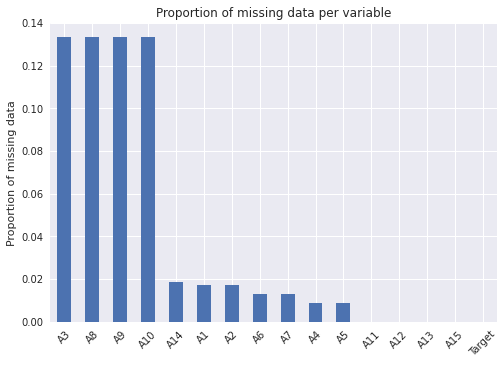

In [49]:
#Find the proportion of missing values per variable, sort them in ascending order, and then make a bar plot, rotating the ticks on the xaxis and adding a title and the y-axis label:

with plt.style.context("seaborn"):
  data.isnull().mean().sort_values(ascending = False).plot.bar(rot = 45)
  plt.ylabel('Proportion of missing data')
  plt.title('Proportion of missing data per variable')

In [52]:
#we’ll remove observations if they have missing values in any variable:
data_cca = data.dropna()

In [54]:
#Let’s print and compare the size of the original and complete case datasets:
print('Total number of observations: {}'.format(len(data)))
print('Total number of observations without any missing data: {}'.format(len(data_cca)))

Total number of observations: 690
Total number of observations without any missing data: 564


In [55]:
#To drop observations with missing data utilizing feature-engine
from feature_engine.imputation import DropMissingData
#Set up the imputer to automatically find the variables with missing data:
cca = DropMissingData(variables=None, missing_only=True)


In [58]:
#Make the transformer identify the variables with missing data
cca.fit(data)
cca.variables_

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A14']

In [59]:
data_cca = cca.transform(data)

In [60]:
len(data_cca)

564

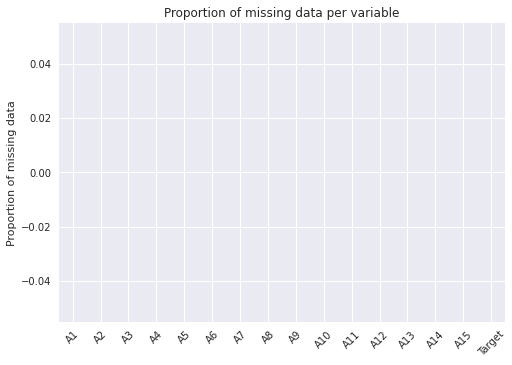

In [64]:
#No missing data found in data_cca
with plt.style.context("seaborn"):
  data_cca.isnull().mean().sort_values(ascending=False).plot.bar(rot=45)
  plt.ylabel('Proportion of missing data')
  plt.title('Proportion of missing data per variable')

To remove observations with missing data in a subset of variables, use DropMissingData(variables=['A3', 'A4']). To remove observations with missing values in at least 5% of the variables, use DropMissingData(threshold=0.95).

We used the pandas isnull() and mean() methods to determine the proportion of missing observations in each variable. The isnull() method created a Boolean vector per variable with the True and False values to indicate whether a value is missing. The mean() method took the average of these values and returned the proportion of missing data. The pandas sort_values()method ordered the variables from that with the least to that with the most missing data. We then used the pandas plot.bar()method to create a bar plot. To remove observations with missing values in any variable, we used the pandas dropna()method, thereby obtaining a complete case dataset.

Finally, we removed missing data using feature-engine’s DropMissingData(), which automatically identified and stored the variables with missing data from the train set when we called the fit() method. With the transform() method, the imputer removed observations with missing data in those variables.

### **Performing mean or median imputation**

Mean or median imputation consists of replacing missing values with the mean or median variable. The mean or median is calculated using a train set, and these values are used to impute missing data in train and test sets, as well as in all future data we intend to use with the machine learning model. Scikit-learn and feature-engine transformers learn the mean or median from the train set and store these parameters for future use out of the box. 

TIP

Use mean imputation if variables are normally distributed and median imputation otherwise.

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from feature_engine.imputation import MeanMedianImputer




In [66]:
data = pd.read_csv('/content/credit_approval_uci.csv')

In [67]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,NaN,u,g,q,h,NaN,NaN,NaN,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,0


In [71]:
#Then, separate the data into train and test sets and their respective targets:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis = 1), data['Target'], 
                                                      test_size = 0.3, random_state = 0)



In [96]:
#Capture the numerical variables in a list. 
numeric_variables = X_train.select_dtypes(exclude ='O').columns.to_list()

In [81]:
median_values = X_train[numeric_variables].median().to_dict()

In [82]:
X_train = X_train.fillna(value = median_values)
X_test.fillna(value = median_values, inplace = True)

**Using scikit-learn:**

In [83]:
#we capture the non-numerical variables in a list:
remaining_vars = [var for var in X_train.columns if var not in numeric_variables]

In [84]:
#set up the imputer to replace missing data with the median: using scikit-learn

imputer = SimpleImputer(strategy = 'median')

In [85]:
imputer

SimpleImputer(strategy='median')

In [88]:
ct = ColumnTransformer([("imputer", imputer, numeric_variables)], remainder='passthrough')

In [89]:
#Fit SimpleImputer() to the train set so that it learns the median values of the variables:
ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(strategy='median'),
                                 ['A2', 'A3', 'A8', 'A11', 'A14', 'A15'])])

In [90]:
ct.named_transformers_.imputer.statistics_

array([ 28.835,   2.75 ,   1.   ,   0.   , 160.   ,   6.   ])

In [91]:
#Let’s replace missing values with the median:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [92]:
#SimpleImputer() returns NumPy arrays. Let’s transform the array into a DataFrame:
X_train = pd.DataFrame(X_train, columns = numeric_variables + remaining_vars)

In [93]:
X_train

,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,46.08,3.0,2.375,8.0,396.0,4159.0,a,u,g,c,v,t,t,t,g
1,15.92,2.875,0.085,0.0,120.0,0.0,a,u,g,q,v,f,f,f,g
2,36.33,2.125,0.085,1.0,50.0,1187.0,b,y,p,w,v,t,t,f,g
3,22.17,0.585,0.0,0.0,100.0,0.0,b,y,p,ff,ff,f,f,f,g
4,57.83,7.04,14.0,6.0,360.0,1332.0,b,u,g,m,v,t,t,t,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,36.75,4.71,0.0,0.0,160.0,0.0,a,u,g,ff,ff,f,f,f,g
479,41.75,0.96,2.5,0.0,510.0,600.0,b,u,g,x,v,t,f,f,g
480,19.58,0.665,1.665,0.0,220.0,5.0,a,u,g,w,v,f,f,f,g
481,22.83,2.29,2.29,7.0,140.0,2384.0,a,u,g,q,h,t,t,t,g


**using feature-engine:**

In [99]:
#First, split the dataset into train and test sets, as in step 3. Next, let’s set up the imputer to replace missing data in numerical variables with the median:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis = 1), data['Target'], 
                                                      test_size = 0.3, random_state = 0)
numeric_variables = X_train.select_dtypes(exclude ='O').columns.to_list()

imputer = MeanMedianImputer(imputation_method = 'median', variables=numeric_variables)

In [100]:
#Fit the imputer so that it learns the median values for the specified variables:
imputer.fit(X_train)


MeanMedianImputer(variables=['A2', 'A3', 'A8', 'A11', 'A14', 'A15'])

In [101]:
imputer.imputer_dict_

{'A2': 28.835, 'A3': 2.75, 'A8': 1.0, 'A11': 0.0, 'A14': 160.0, 'A15': 6.0}

In [102]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [103]:
X_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,a,36.75,4.710,u,g,ff,ff,0.000,f,f,0,f,g,160.0,0
192,b,41.75,0.960,u,g,x,v,2.500,t,f,0,f,g,510.0,600
629,a,19.58,0.665,u,g,w,v,1.665,f,f,0,f,g,220.0,5
559,a,22.83,2.290,u,g,q,h,2.290,t,t,7,t,g,140.0,2384


In [106]:
#Checking if it contains missing values
X_train[numeric_variables].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
A14    0.0
A15    0.0
dtype: float64

How it works:

To impute missing data with pandas, in step 6, we created a dictionary with the numerical variable names as keys and their medians as values, utilizing the training set. To capture the median, we used pandas median(), and to return a dictionary, we used pandas to_dict(). To replace missing data with the median, we used the pandas fillna()method in the train and test sets, passing the dictionary with the median values per variable as a parameter.

To replace the missing values using scikit-learn, we used SimpleImputer() with strategy set to "median". To impute only numerical variables, we used ColumnTransformer(), which takes the imputer and the numerical variable names in a list as parameters. With the passthrough argument set to "remainder", we make ColumnTransformer() return all the variables in the final output, the imputed ones followed by the remaining ones.

With the fit() method, SimpleImputer() learned the median of each numerical variable in the train set and stored them in its statistics_ attribute. With transform(), the transformer replaced the missing values with the medians.

To replace missing values with feature-engine, we set up MeanMedianImputer() with imputation_method set to "median" and passed the names of the variables to impute in a list. With the fit() method, the transformer learned and stored the median values of the specified variables in a dictionary in its imputer_dict_ attribute. With the transform() method, the missing values were replaced, returning a pandas DataFrame.